<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Final Project Submission</a></span></li></ul></li><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#Data-Import-&amp;-EDA" data-toc-modified-id="Data-Import-&amp;-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Import &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#Resample-Data" data-toc-modified-id="Resample-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resample Data</a></span></li></ul></li><li><span><a href="#Feature-Engineering-&amp;-Modeling" data-toc-modified-id="Feature-Engineering-&amp;-Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering &amp; Modeling</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering-and-selection-with-PCA" data-toc-modified-id="Feature-engineering-and-selection-with-PCA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature engineering and selection with PCA</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Baseline-Model---Random-Forest-Classifier-with-baseline-parameters" data-toc-modified-id="Baseline-Model---Random-Forest-Classifier-with-baseline-parameters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Baseline Model - Random Forest Classifier with baseline parameters</a></span></li><li><span><a href="#Model-#1:-Random-Forest" data-toc-modified-id="Model-#1:-Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model #1: Random Forest</a></span></li><li><span><a href="#Model-#2:-KNN" data-toc-modified-id="Model-#2:-KNN-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model #2: KNN</a></span></li><li><span><a href="#Model-#3:-Adaboost" data-toc-modified-id="Model-#3:-Adaboost-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Model #3: Adaboost</a></span></li></ul></li><li><span><a href="#Return-to-Random-Forest" data-toc-modified-id="Return-to-Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Return to Random Forest</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering/selection---reduce-dimensionality" data-toc-modified-id="Feature-engineering/selection---reduce-dimensionality-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature engineering/selection - reduce dimensionality</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit Model</a></span></li></ul></li><li><span><a href="#Final-Model-on-Test-Data" data-toc-modified-id="Final-Model-on-Test-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Model on Test Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Business Case

Aronson Consulting is looking into predicting tree types in the Roosevelt National Forest in Colorado for purposes of understanding the landscape.  The dataset used contains tree observations from four areas of the Roosevelt National Forest.  This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.  Based on these characteristics Aronson Consulting will develop a model to predict the type of trees that is growing. 

# Data Import & EDA

In [1]:
#import drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.feature_selection import SelectFromModel

In [3]:
#import data
data_raw = pd.read_csv('drive/My Drive/covtype.csv')
print(len(data_raw))
data_raw.head()

581012


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


There are 581,012 data records in the dataset

Background on Data: 

Features: Name / Data Type / Measurement / Description
- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
- Wilderness_Area(#):
 - Wilderness_Area2 = Neota) has the highest mean elevational value 
  - Wilderness_Area1 (Rawah) & Wilderness Area3 (Comanche Peak) have lower mean elevation value 
 - Wilderness_Area4 = Cache la Poudre has the lowest mean elevational value 

Target: Cover_Type:
- 1 = "Spruce/Fir", 2 = "Lodgepole Pine", 3 = "Ponderosa Pine", 4 = "Cottonwood/WIllow", 5 = "Aspen", 6 = "Douglas-fir", and 7 = "Krummholz" according to Kaggle 

In [4]:
#review dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

All data types are integers and it does not appear there is any missing data.  However I'll explore this further.

In [5]:
#explore if there are any NaN values in the data
data_raw.isna().any().any()

False

There are no NaN values in the dataset

In [6]:
#review comlumns
data_raw.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [7]:
#review categorical data for classification
data_raw.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [0]:
#Combine Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology 
#into Distance_To_Hydrology using Pythagorean's Theorem
data_raw['Distance_To_Hydrology'] = (data_raw.Horizontal_Distance_To_Hydrology**2
                                  * data_raw.Vertical_Distance_To_Hydrology**2)**0.5

In [9]:
#drop Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology 
data = data_raw.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-null int64
Soil_Type2                            581012 non-null int64
Soil_Type3                            581012 non-

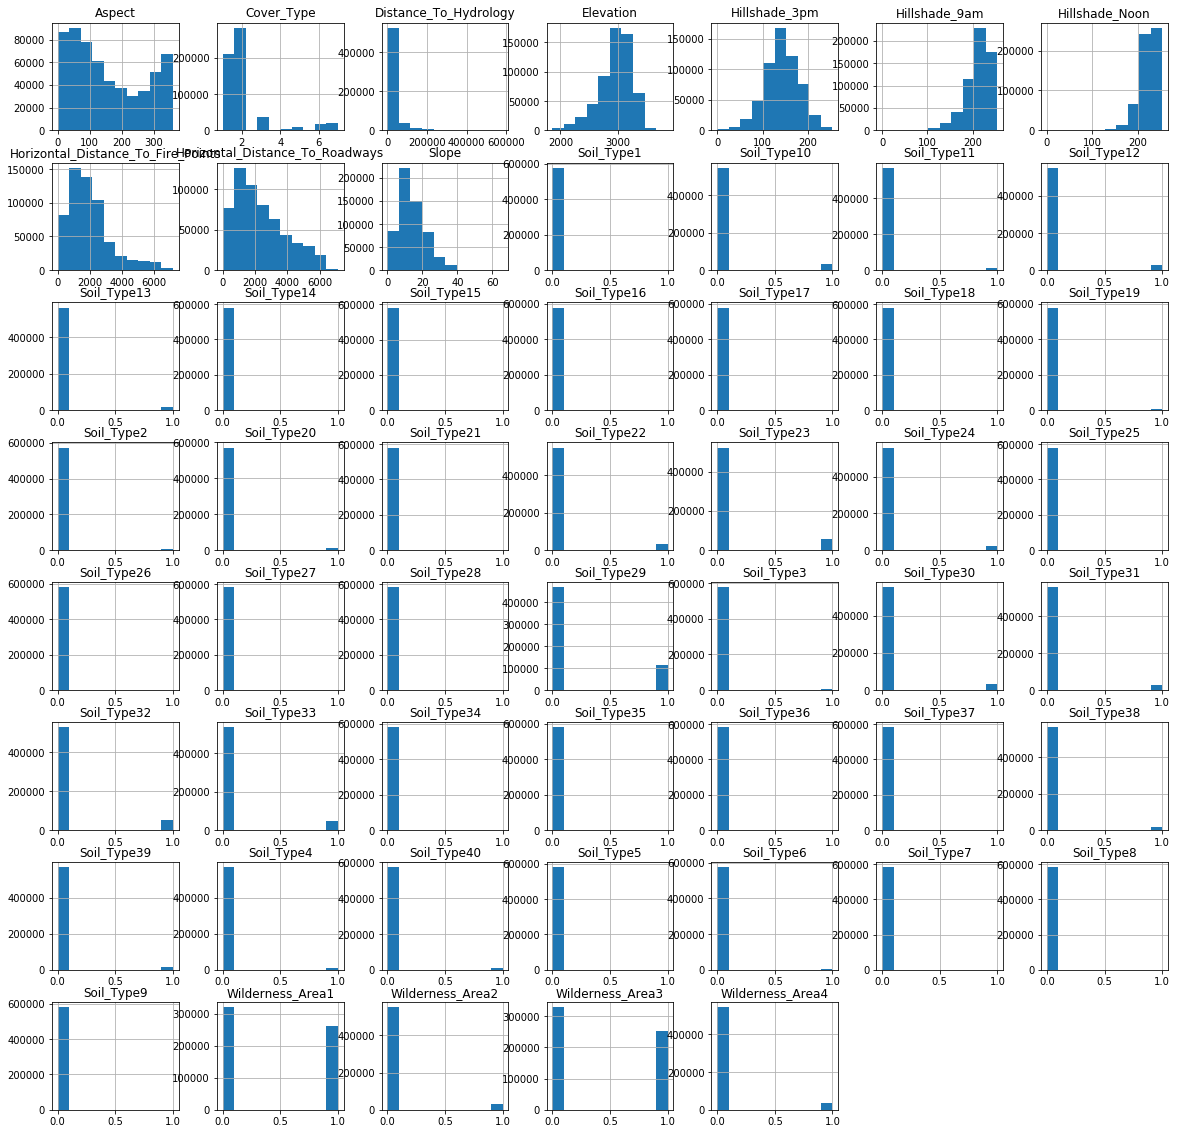

In [10]:
#look at distribution of data
data.hist(figsize = (20,20));

- Wilderness area, soil type and cover_type are binary 
- Aspect, Distance to Hydrology, Elevation, Slope, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points are all continuous and are either right or left skewed

In [11]:
#create new dataset for continuous features
cont_data = data.loc[:,['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 
                      'Horizontal_Distance_To_Roadways','Hillshade_9am', 
                      'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
print(len(cont_data))
cont_data.head()

581012


,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,0.0,510,221,232,148,6279
1,2590,56,2,1272.0,390,220,235,151,6225
2,2804,139,9,17420.0,3180,234,238,135,6121
3,2785,155,18,28556.0,3090,238,238,122,6211
4,2595,45,2,153.0,391,220,234,150,6172


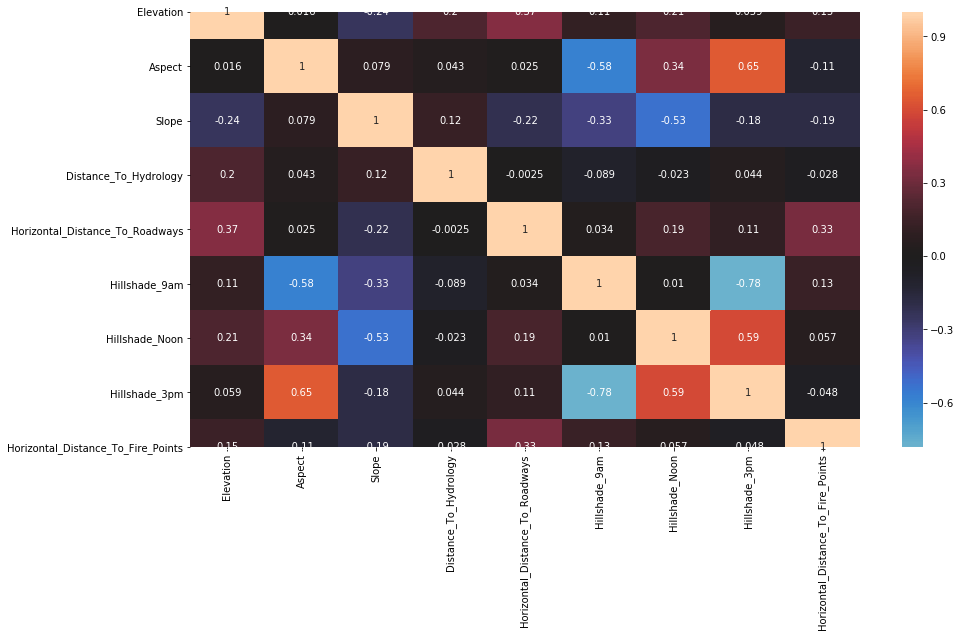

In [12]:
#create a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(), center=0, annot=True)

Correlated features:
- Aspect and Hillshade_3pm
- Hillshade_Noon and Hillshade_3pm

## Resample Data

In [0]:
#separate different classes
data_ct1 = data[data.Cover_Type == 1]
data_ct2 = data[data.Cover_Type == 2]
data_ct3 = data[data.Cover_Type == 3]
data_ct4 = data[data.Cover_Type == 4]
data_ct5 = data[data.Cover_Type == 5]
data_ct6 = data[data.Cover_Type == 6]
data_ct7 = data[data.Cover_Type == 7]

In [14]:
#resample data
n = math.ceil(50000 / 7)
data_ct1_downsample = resample(data_ct1, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct2_downsample = resample(data_ct2, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct3_downsample = resample(data_ct3, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct4_upsample = resample(data_ct4, 
                             replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct5_downsample = resample(data_ct5, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct6_downsample = resample(data_ct6, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results
data_ct7_downsample = resample(data_ct7, 
                               replace=True, #sample with replacement
                              n_samples=n, #to total 50K when finished
                              random_state = 123) #reproducible results

data_sampled = pd.concat([data_ct1_downsample, data_ct2_downsample, data_ct3_downsample,
                         data_ct4_upsample, data_ct5_downsample, data_ct6_downsample,
                         data_ct7_downsample])

data_sampled.Cover_Type.value_counts()

7    7143
6    7143
5    7143
4    7143
3    7143
2    7143
1    7143
Name: Cover_Type, dtype: int64

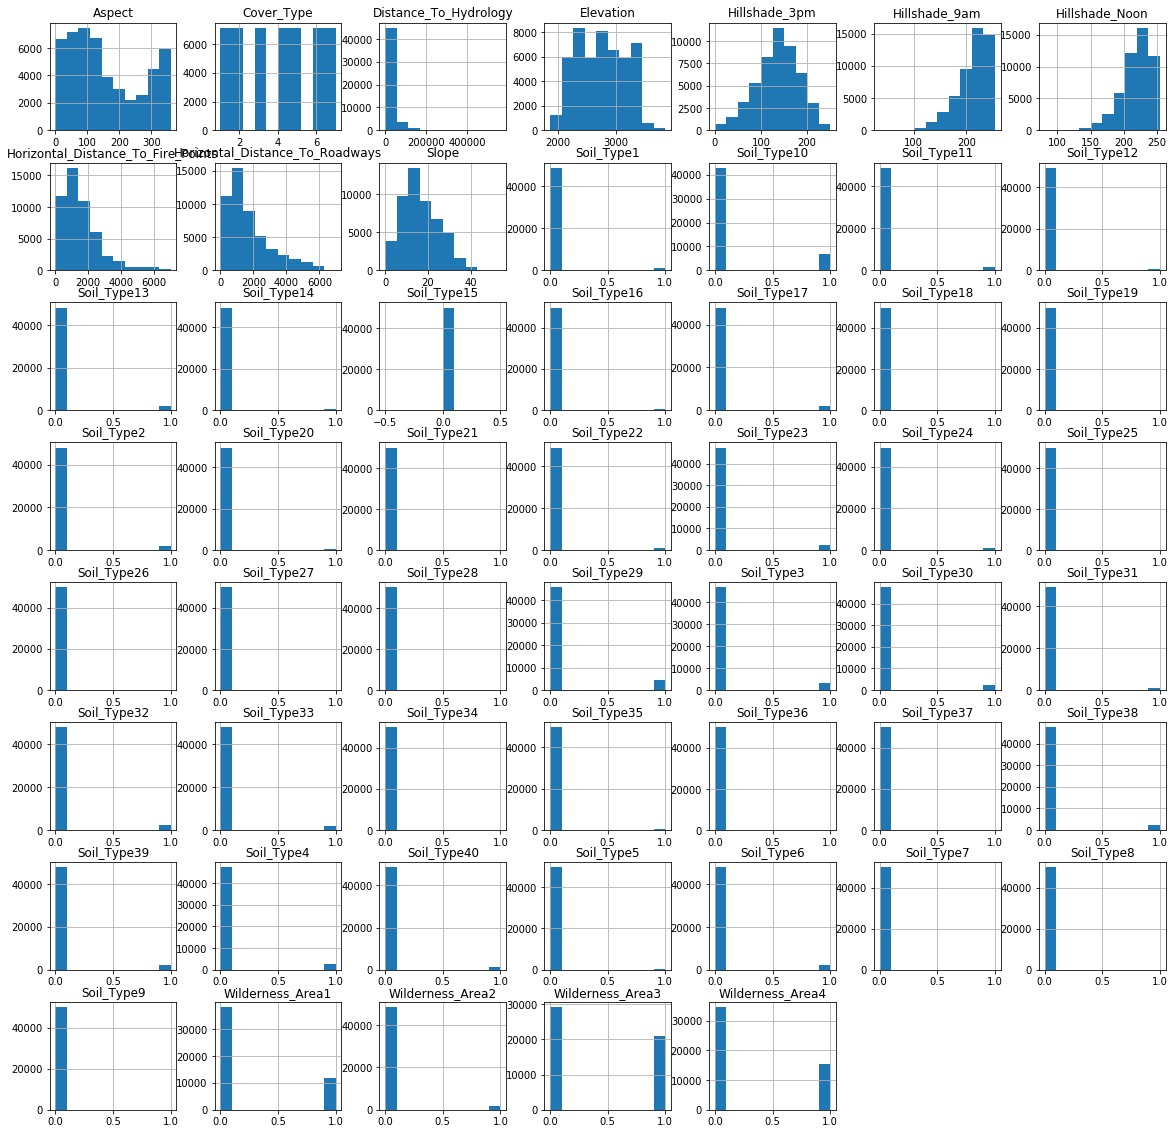

In [15]:
#look at distribution of sample data
data_sampled.hist(figsize = (20,20));

Comparing distributions the sample population looks similar, except that elevation is a bit more flat than normal. 

In [16]:
#Check why there is no longer Soil_Type15
data.Soil_Type15.value_counts()

0    581009
1         3
Name: Soil_Type15, dtype: int64

There were only 3 data points with this soil type, PCA will take care of this if needed

In [17]:
#Check correlation of sample data
cont_data_sampled = data_sampled.loc[:,['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 
                      'Horizontal_Distance_To_Roadways','Hillshade_9am', 
                      'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
print(len(cont_data_sampled))
cont_data_sampled.head()

50001


,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
67445,3254,75,7,17885.0,3034,228,228,133,4708
128508,3149,341,16,6480.0,3241,186,215,167,3085
75226,2972,321,10,1950.0,4796,194,230,176,4607
526081,3097,265,21,25800.0,3290,162,244,218,1503
399807,3321,286,7,77880.0,797,201,240,179,968


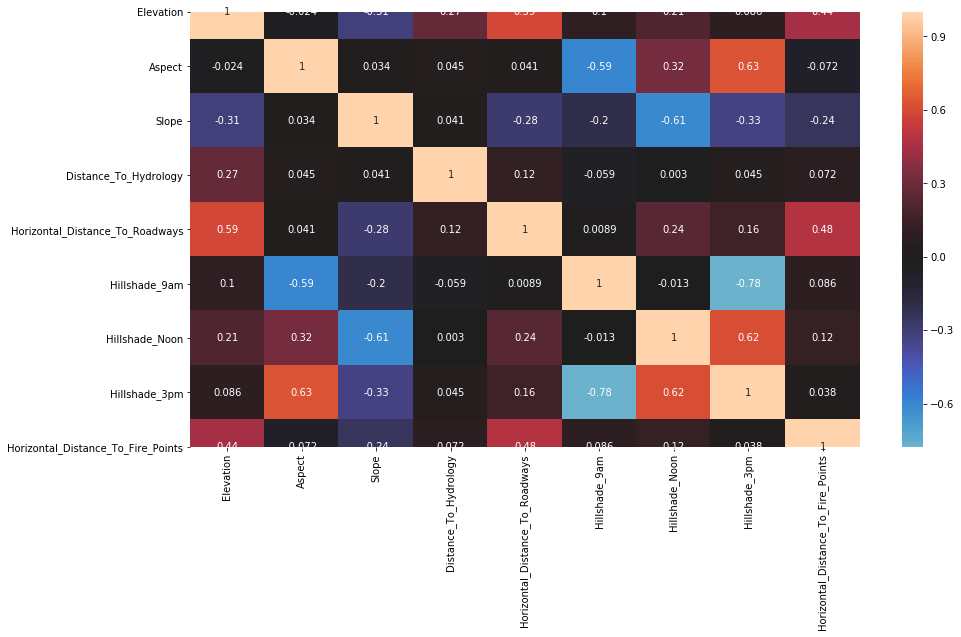

In [18]:
#check heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cont_data_sampled.corr(), center=0, annot=True)

Correlated Data:
- Hillshade_3pm and Aspect (same as before)
- Hillshade_3pm and Hillshade_Noon (same as before)
- Elevation and Horizontal_Distance_To_Roadways (more correlated now, was at 0.37 before)

Correlation will be fixed when we perform PCA if needed, but I want to look at Elevation and Horizontal_Distance_To_Roadways more

In [19]:
#define continuous feature columns
cont_features = cont_data_sampled.columns
cont_features

Index(['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [20]:
#look at sampled data
data_sampled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology
67445,3254,75,7,3034,228,228,133,4708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,17885.0
128508,3149,341,16,3241,186,215,167,3085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,6480.0
75226,2972,321,10,4796,194,230,176,4607,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1950.0
526081,3097,265,21,3290,162,244,218,1503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25800.0
399807,3321,286,7,797,201,240,179,968,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,77880.0


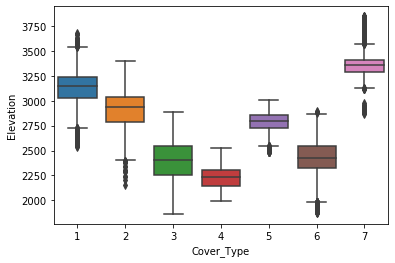

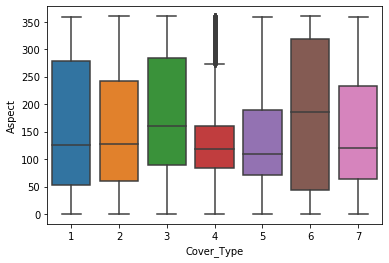

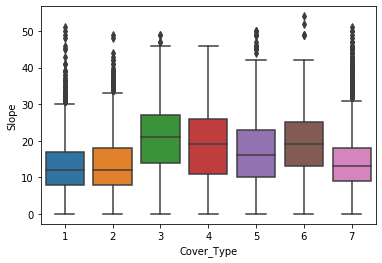

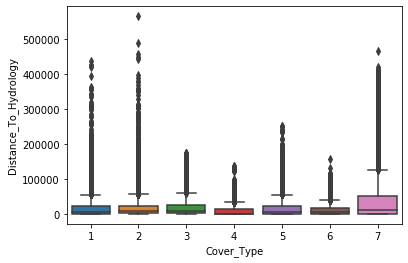

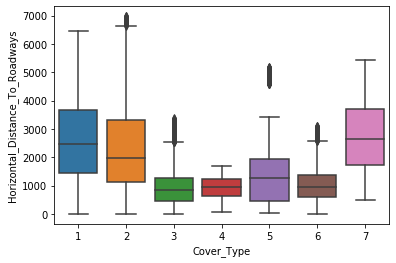

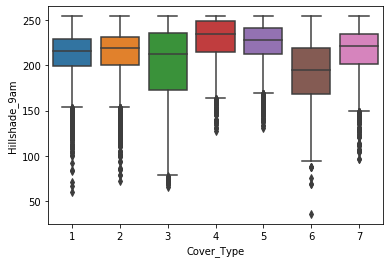

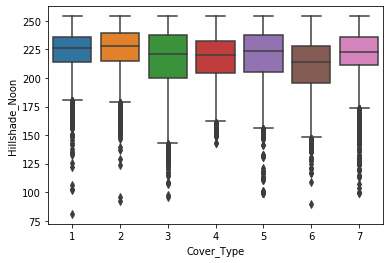

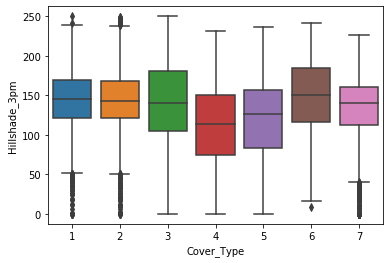

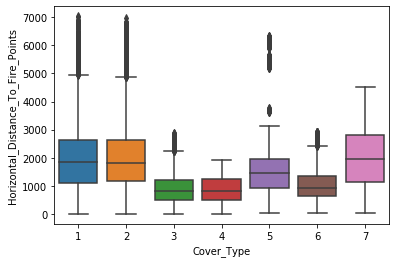

In [21]:
#create boxplots for continuous features
for feat in cont_features:
    sns.boxplot(x='Cover_Type', y=feat, data=data_sampled)
    plt.show()

Elevation looks like a better predictor of Cover_Type then the other continuous features, including Horizontal Distance to Roadways

In [22]:
#Review Soil Type
data_soil = data_sampled.loc[:,'Soil_Type1':'Soil_Type40']
data_soil.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
67445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
128508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
526081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
399807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


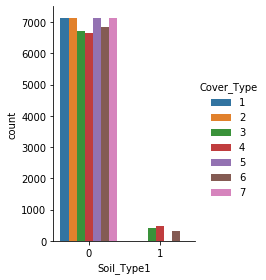

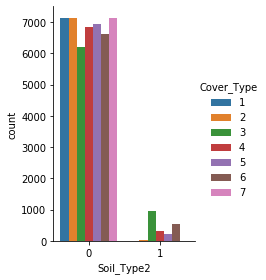

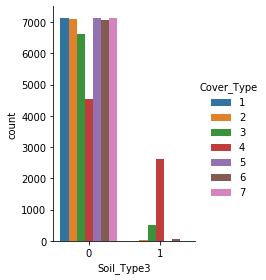

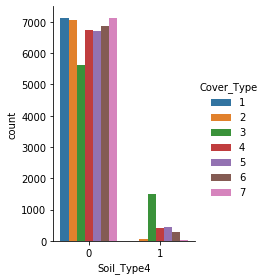

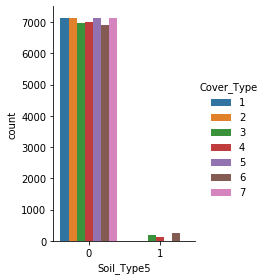

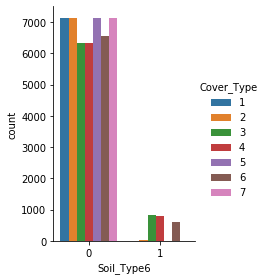

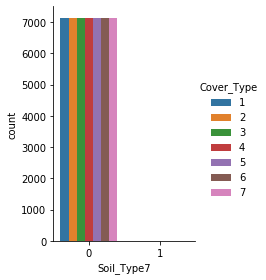

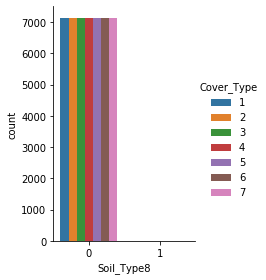

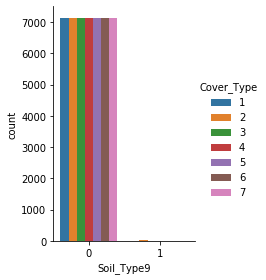

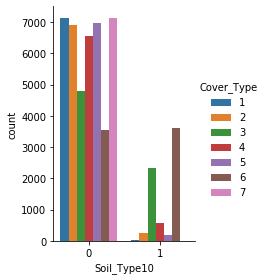

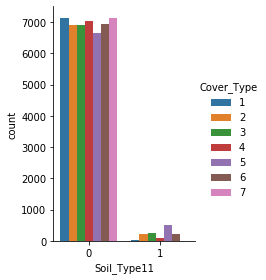

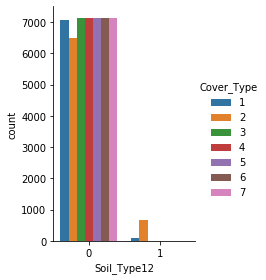

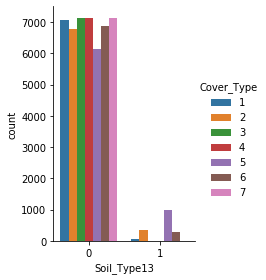

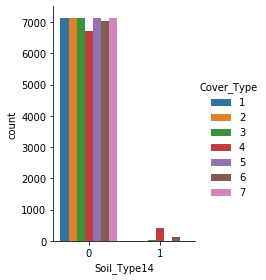

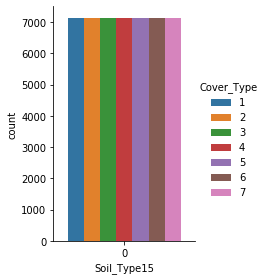

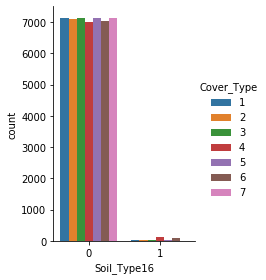

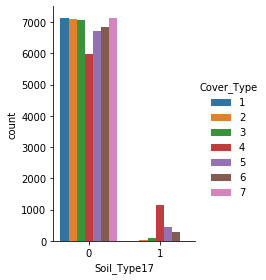

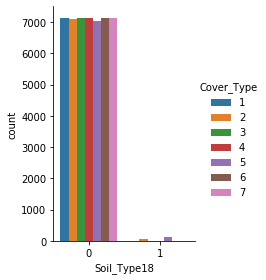

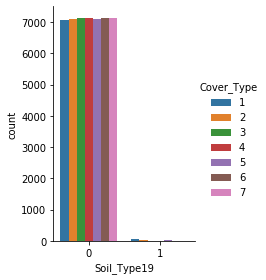

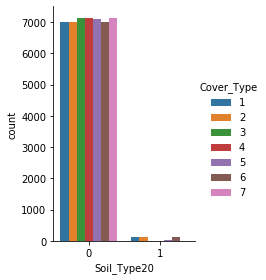

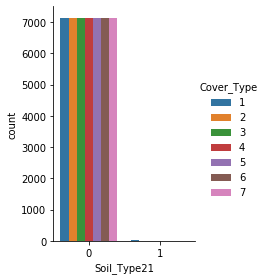

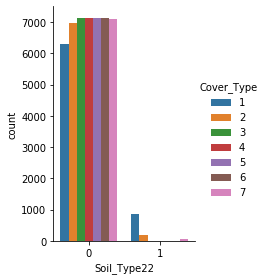

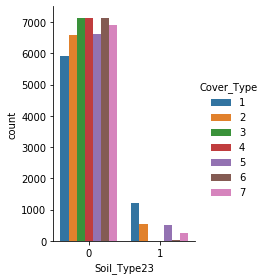

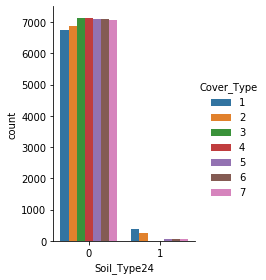

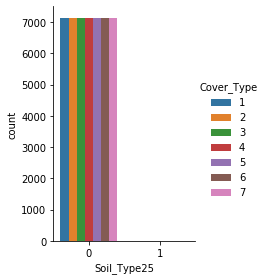

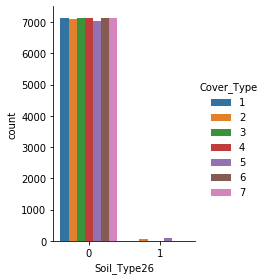

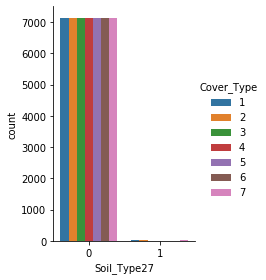

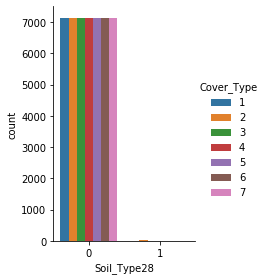

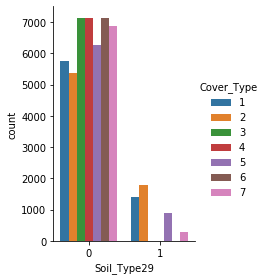

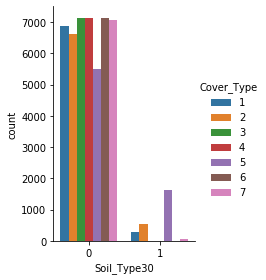

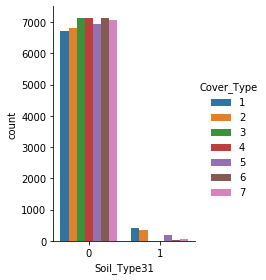

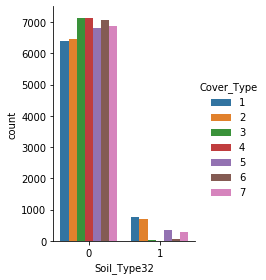

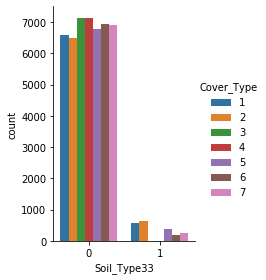

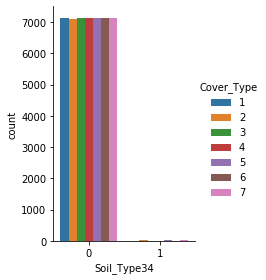

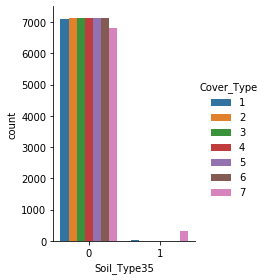

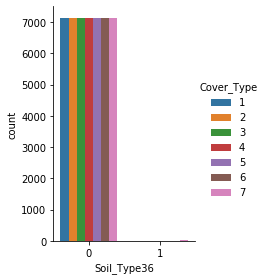

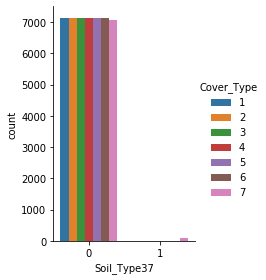

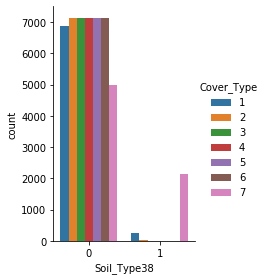

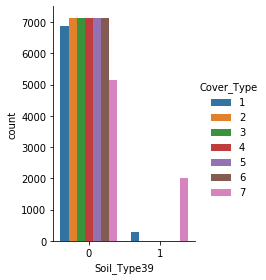

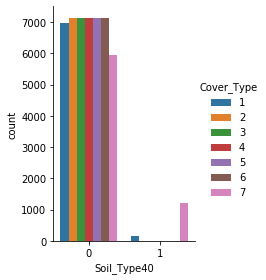

In [23]:
#create charts to look at soil types
for soil in data_soil.columns:
    sns.catplot(x=soil, hue='Cover_Type', data=data_sampled, kind="count",
                height=4, aspect=.7)
    plt.show()

There are barely any trees in our sample data that have Soil_Type7, Soil_Type8 or Soil_Type25.  PCA will take care of this when performed

# Feature Engineering & Modeling

## Feature engineering and selection with PCA

In [24]:
#create dataframe of features
feat = data_sampled.drop('Cover_Type', axis=1)
feat.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology
67445,3254,75,7,3034,228,228,133,4708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17885.0
128508,3149,341,16,3241,186,215,167,3085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6480.0
75226,2972,321,10,4796,194,230,176,4607,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1950.0
526081,3097,265,21,3290,162,244,218,1503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25800.0
399807,3321,286,7,797,201,240,179,968,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,77880.0


In [25]:
#perform PCA
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=35)
pca_3 = PCA(n_components=52)

principalComponents = pca_1.fit_transform(feat)
principalComponents = pca_2.fit_transform(feat)
principalComponents = pca_3.fit_transform(feat)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.9999999997835403
0.9999999999821415
1.0


Using PCA I can see that I maintain 99% of my explained variance even as I decrease the number of features. Therefore, I'll keep all the features since there is not much difference, no need to eliminate 

## Train/Test Split

In [0]:
#Build Train/Validation and Test Sets
y = data_sampled['Cover_Type']
X = data_sampled.drop('Cover_Type', axis=1)

In [0]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Baseline Model - Random Forest Classifier with baseline parameters

In [28]:
#construct baseline pipeline
pipe_rf_base = Pipeline([('clf', RandomForestClassifier(random_state=123))])
# Fit the baseline pipeline
model_base = pipe_rf_base.fit(X_train, y_train)
#prediction
y_pred = model_base.predict(X_val)
#score
print("Accuracy -- ", pipe_rf_base.score(X_val, y_val)*100)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy --  88.225


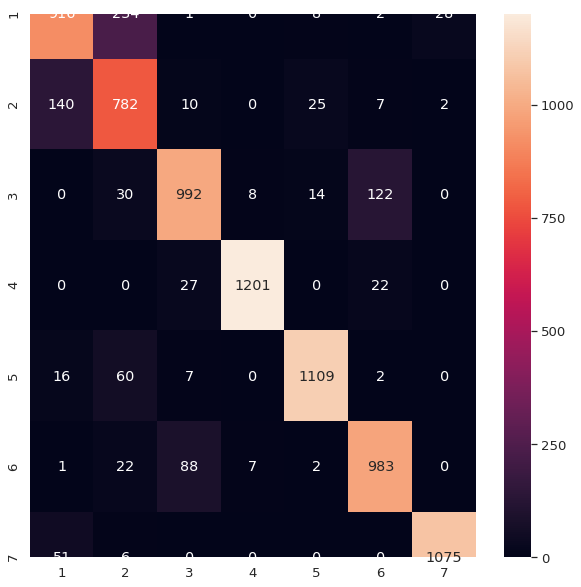

In [29]:
#confusion matrix
cm = confusion_matrix(y_pred, y_val)
df_cm = pd.DataFrame(cm, index = [i for i in range(1,8)], columns = [i for i in range(1,8)])
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

We see mostly true positives in our confusion matrix here, however we see larger misclassification for Cover_Type's 1 with 2 and 6 with 3.  

AUC for Cover Type 1: 0.9706351997457761
AUC for Cover Type 2: 0.95593140752865
AUC for Cover Type 3: 0.9862842828282827
AUC for Cover Type 4: 0.9990294379771288
AUC for Cover Type 5: 0.9958394736563105
AUC for Cover Type 6: 0.9898140033059476
AUC for Cover Type 7: 0.997360865470749


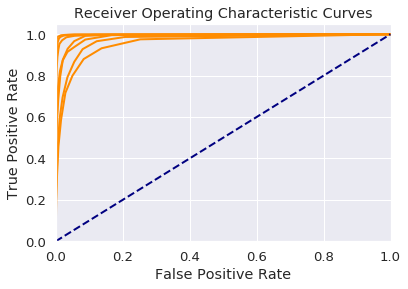

In [30]:
# Compute ROC curve and ROC area for each tree type class
y_score_base = model_base.predict_proba(X_val)

# Binarize the output
y_val_bin = label_binarize(y_val, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = y_val_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score_base[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()


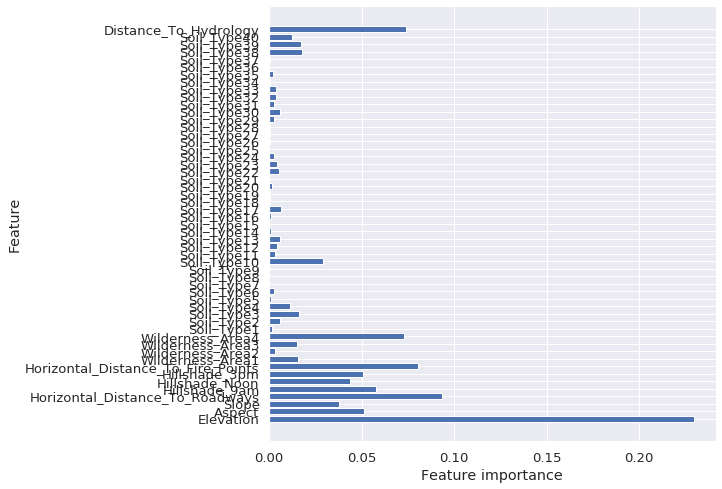

In [31]:
#review feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.named_steps['clf'].feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(model_base)

Again we see that Elevation is a very important feature for predicting tree type, followed by Horizontal_Distance_To_Roadways and Distance_To_Hydrology

## Model #1: Random Forest

After using an initial grid search the best parameters providing 0.888 (higher than the baseline model of 0.882) for fitting our model are:
- 'clf__criterion': 'gini'
- 'clf__max_depth': 30
- 'clf__min_samples_leaf': 1
- 'clf__min_samples_split': 2
- 'clf__n_estimators': 800


Parameter tuning improved performance marginally, by about 0.6%. This is good, but we can probably do better.

Trying a second grid search removing the default parameters to see if I can increase this a bit

In [32]:
# Construct pipeline
pipe1_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [800,1000], 
   'clf__max_depth': [30,50],  
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe1_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] clf__max_depth=30, clf__n_estimators=800 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... clf__max_depth=30, clf__n_estimators=800, total=  29.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s remaining:    0.0s


[CV] clf__max_depth=30, clf__n_estimators=800 ........................
[CV] ......... clf__max_depth=30, clf__n_estimators=800, total=  29.8s
[CV] clf__max_depth=30, clf__n_estimators=800 ........................
[CV] ......... clf__max_depth=30, clf__n_estimators=800, total=  29.6s
[CV] clf__max_depth=30, clf__n_estimators=1000 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1000, total=  37.1s
[CV] clf__max_depth=30, clf__n_estimators=1000 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1000, total=  37.3s
[CV] clf__max_depth=30, clf__n_estimators=1000 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1000, total=  37.0s
[CV] clf__max_depth=50, clf__n_estimators=800 ........................
[CV] ......... clf__max_depth=50, clf__n_estimators=800, total=  29.9s
[CV] clf__max_depth=50, clf__n_estimators=800 ........................
[CV] ......... clf__max_depth=50, clf__n_estimators=800, total=  29.8s
[CV] c

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.1min finished


Best accuracy: 0.889

Best params:
 {'clf__max_depth': 30, 'clf__n_estimators': 1000}


Keeping the max_depth at 30 and increasing the n_estimators to 1000 increases the accuracy from 0.888 to 0.889, I'll make one other tweek to see if I can improve the model

In [33]:
# Construct pipeline
pipe1_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [1000,1500], 
   'clf__max_depth': [30],  
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe1_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] clf__max_depth=30, clf__n_estimators=1000 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ clf__max_depth=30, clf__n_estimators=1000, total=  36.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.5s remaining:    0.0s


[CV] clf__max_depth=30, clf__n_estimators=1000 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1000, total=  37.2s
[CV] clf__max_depth=30, clf__n_estimators=1000 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1000, total=  36.8s
[CV] clf__max_depth=30, clf__n_estimators=1500 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1500, total=  55.9s
[CV] clf__max_depth=30, clf__n_estimators=1500 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1500, total=  55.4s
[CV] clf__max_depth=30, clf__n_estimators=1500 .......................
[CV] ........ clf__max_depth=30, clf__n_estimators=1500, total=  55.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.2min finished


Best accuracy: 0.889

Best params:
 {'clf__max_depth': 30, 'clf__n_estimators': 1000}


Increasing the n_estimators to 1500 didn't help so I'll keep it at 1,000

In [0]:
#construct rf pipeline
pipe_rf = Pipeline([('clf', RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=123))])
# Fit the rf pipeline
model_rf = pipe_rf.fit(X_train, y_train)
#prediction
y_pred_rf = model_rf.predict(X_val)

AUC for Cover Type 1: 0.9836349911704851
AUC for Cover Type 2: 0.9762691425838333
AUC for Cover Type 3: 0.9933666909090909
AUC for Cover Type 4: 0.9996042109530164
AUC for Cover Type 5: 0.9986060898877652
AUC for Cover Type 6: 0.9951875769308984
AUC for Cover Type 7: 0.9993106028041829


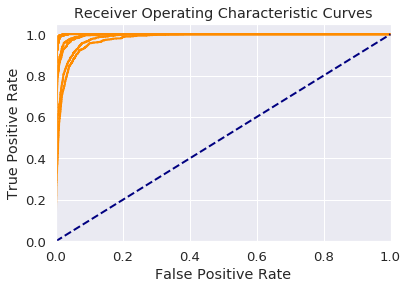

In [35]:
# Compute ROC curve and ROC area for each tree type class
y_score_rf = model_rf.predict_proba(X_val)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score_rf[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

## Model #2: KNN

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_val, y_val) 

Visualize the change in accuracies with respect to train and test data at different neighbors

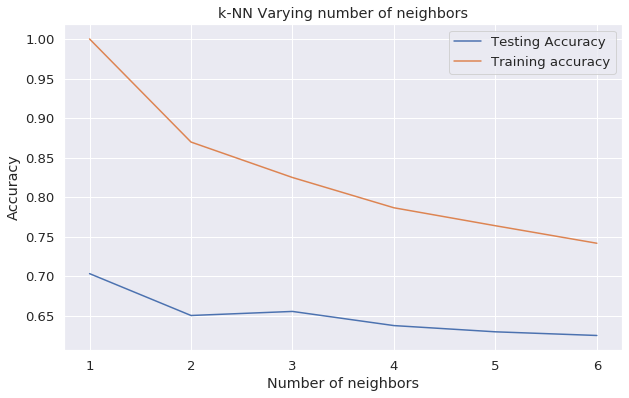

In [37]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Neighbor value = 1 yeilds the best result, however, this is still less than what I got with random forest so I'll look if I can imporve using scalers

In [38]:
#construct KNN pipeline
pipe_knn = Pipeline([('clf', KNeighborsClassifier(n_neighbors=1))])
# Fit the KNN pipeline
model_knn = pipe_knn.fit(X_train, y_train)
#prediction
y_pred_knn = model_knn.predict(X_val)
#score
print("Accuracy -- ", pipe_knn.score(X_val, y_val)*100)

Accuracy --  70.35


In [39]:
#construct KNN pipeline with scaler
pipe_knn_2 = Pipeline([('mms', StandardScaler()),('clf', KNeighborsClassifier(n_neighbors=1))])
# Fit the KNN pipeline
model_knn_2 = pipe_knn_2.fit(X_train, y_train)
#prediction
y_pred_knn_2 = model_knn_2.predict(X_val)
#score
print("Accuracy -- ", pipe_knn_2.score(X_val, y_val)*100)

Accuracy --  86.8625


In [40]:
#construct KNN pipeline with scaler
pipe_knn_2 = Pipeline([('mms', MinMaxScaler()),('clf', KNeighborsClassifier(n_neighbors=1))])
# Fit the KNN pipeline
model_knn_2 = pipe_knn_2.fit(X_train, y_train)
#prediction
y_pred_knn_2 = model_knn_2.predict(X_val)
#score
print("Accuracy -- ", pipe_knn_2.score(X_val, y_val)*100)

Accuracy --  87.1


AUC for Cover Type 1: 0.8757437287672424
AUC for Cover Type 2: 0.8325259913763651
AUC for Cover Type 3: 0.9038383838383838
AUC for Cover Type 4: 0.9788783205064548
AUC for Cover Type 5: 0.9655364433532803
AUC for Cover Type 6: 0.9298394049089277
AUC for Cover Type 7: 0.9833940917249369


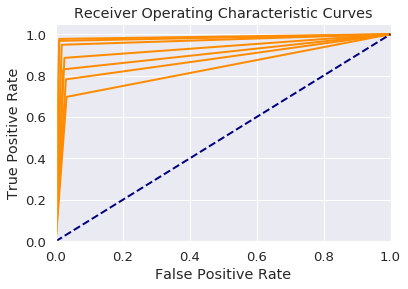

In [41]:
# Compute ROC curve and ROC area for each tree type class
y_score_knn = model_knn_2.predict_proba(X_val)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score_knn[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()


The final accuracy rate for KNN is less than for random forest, now to check Adaboost

## Model #3: Adaboost

In [42]:
# Construct pipeline
pipe_ab = Pipeline([('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_ab.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_ab.best_score_)

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   1.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   1.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   1.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   1.8s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   1.8s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   1.8s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   2.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   2.5s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   59.3s finished


Best accuracy: 0.449

Best params:
 {'clf__learning_rate': 0.5, 'clf__n_estimators': 70}


In [43]:
#construct adaboost pipeline
pipe_ada = Pipeline([('clf', AdaBoostClassifier(learning_rate = 0.5, n_estimators=100, random_state = 123))])
# Fit the adaboost pipeline
model_ada = pipe_ada.fit(X_train, y_train)
#prediction
y_pred_ada = model_ada.predict(X_val)
#score
print("Accuracy -- ", pipe_ada.score(X_val, y_val)*100)

Accuracy --  44.175


In [44]:
#construct adaboost pipeline with minmaxscaler
pipe_ada_2 = Pipeline([('mms', MinMaxScaler()),('clf', AdaBoostClassifier(learning_rate = 0.5, n_estimators=100, random_state = 123))])
# Fit the adaboost pipeline
model_ada_2 = pipe_ada_2.fit(X_train, y_train)
#prediction
y_pred_ada_2 = model_ada_2.predict(X_val)
#score
print("Accuracy -- ", pipe_ada_2.score(X_val, y_val)*100)

Accuracy --  44.175


I got a better result with n_estimators of 100 than 70, the scaler doesn't make a change

AUC for Cover Type 1: 0.7488115607642447
AUC for Cover Type 2: 0.5750540967916442
AUC for Cover Type 3: 0.7869571232323234
AUC for Cover Type 4: 0.9444303692511793
AUC for Cover Type 5: 0.8307271985132971
AUC for Cover Type 6: 0.807717254393545
AUC for Cover Type 7: 0.9457004387073065


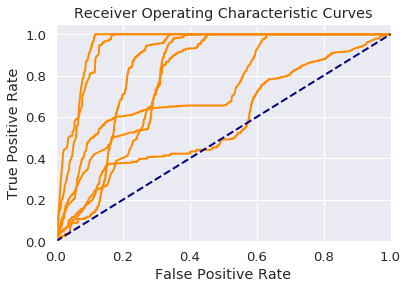

In [45]:
# Compute ROC curve and ROC area for each tree type class
y_score_ada = model_ada.predict_proba(X_val)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score_ada[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Adaboost returns an accuracy rate of 0.44, therefore I've found the most promising results through Random Forest and will return back to it to see if I can improve results with some Feature engineering

# Return to Random Forest

## Feature engineering/selection - reduce dimensionality

In [46]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(X_train)
print(New_features.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(32000, 16)


## Fit Model

In [47]:
#Attempt 1
Val_features = model.transform(X_val)
#construct rf pipeline
pipe_rf_2 = Pipeline([('clf', RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=123))])
# Fit the rf pipeline
model_rf_2 = pipe_rf_2.fit(New_features, y_train)
#prediction
y_pred_rf_2 = model_rf_2.predict(Val_features)
#score
print("Accuracy -- ", pipe_rf_2.score(Val_features, y_val)*100)

Accuracy --  90.1125


This didn't increased slightly from before, I'll see if scalers help any more

In [48]:
#Attempt 2
#construct rf pipeline with scaler
pipe_rf_3 = Pipeline([('mms', MinMaxScaler()),('clf', RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=123))])
# Fit the rf pipeline
model_rf_3 = pipe_rf_3.fit(X_train, y_train)
#prediction
y_pred_rf_3 = model_rf_3.predict(X_val)
#score
print("Accuracy -- ", pipe_rf_3.score(X_val, y_val)*100)

Accuracy --  90.7625


In [49]:
#Attempt 3
#construct rf pipeline with scaler
pipe_rf_4 = Pipeline([('mms', StandardScaler()),('clf', RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=123))])
# Fit the rf pipeline
model_rf_4 = pipe_rf_4.fit(X_train, y_train)
#prediction
y_pred_rf_4 = model_rf_4.predict(X_val)
#score
print("Accuracy -- ", pipe_rf_4.score(X_val, y_val)*100)

Accuracy --  90.75


Looks like Attempt 2 is my best model giving me 90.7625% accuracy using a MinMaxScaler and Random forest model with n_estimators=1000 and max_depth=30

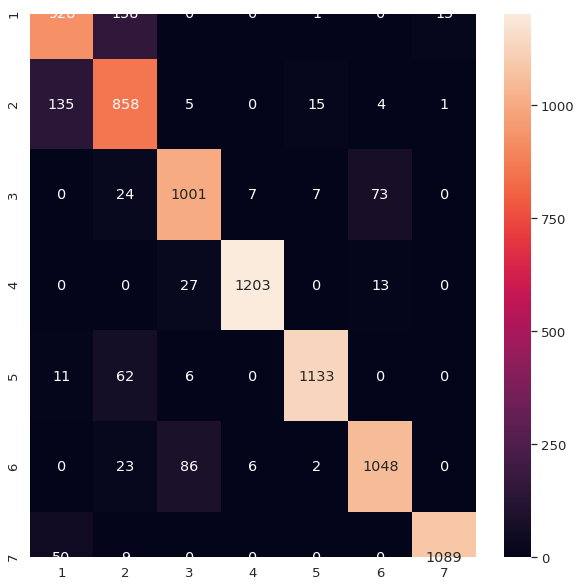

In [50]:
#confusion matrix on final model
cm = confusion_matrix(y_pred_rf_4, y_val)
df_cm = pd.DataFrame(cm, index = [i for i in range(1,8)], columns = [i for i in range(1,8)])
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

AUC for Cover Type 1: 0.9836047788066802
AUC for Cover Type 2: 0.9762568128307522
AUC for Cover Type 3: 0.9933712161616162
AUC for Cover Type 4: 0.9996018471286929
AUC for Cover Type 5: 0.9986054588165446
AUC for Cover Type 6: 0.9951827747524765
AUC for Cover Type 7: 0.9993088965379201


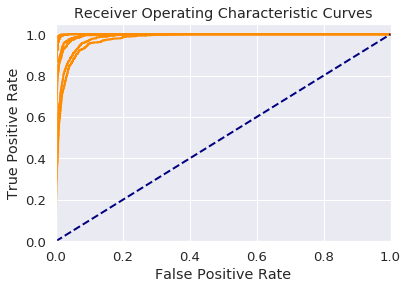

In [51]:
#ROC Curve & AUC
y_score_rf_final = model_rf_4.predict_proba(X_val)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score_rf_final[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

# Final Model on Test Data

In [52]:
#construct rf pipeline with scaler
pipe_rf_test = Pipeline([('mms', MinMaxScaler()),('clf', RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=123))])
# Fit the rf pipeline
model_rf_test = pipe_rf_test.fit(X_train, y_train)
#prediction
y_pred_rf_test = model_rf_test.predict(X_test)
#score
print("Accuracy -- ", pipe_rf_test.score(X_test, y_test)*100)

Accuracy --  90.44095590440956


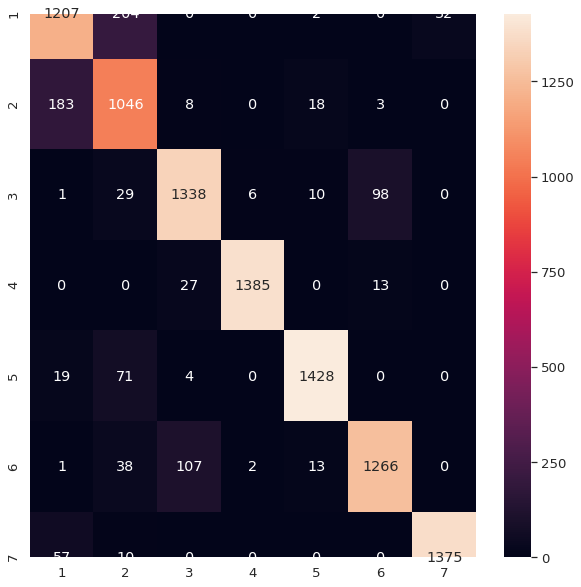

In [53]:
#confusion matrix on final model
cm = confusion_matrix(y_pred_rf_test, y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(1,8)], columns = [i for i in range(1,8)])
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

AUC for Cover Type 1: 0.9833184900678917
AUC for Cover Type 2: 0.9749233682165303
AUC for Cover Type 3: 0.9932212631974041
AUC for Cover Type 4: 0.9996904747449409
AUC for Cover Type 5: 0.9987327088860606
AUC for Cover Type 6: 0.9939535915837464
AUC for Cover Type 7: 0.9991900681439374


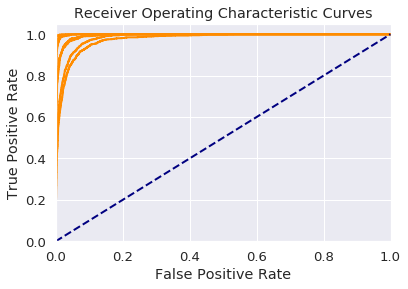

In [54]:
#ROC Curve & AUC
y_score_test = model_rf_test.predict_proba(X_test)


# Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Cover Type {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

# Conclusion

The final model we'll use to predict tree cover type is a Random Forest Classifier with n_estimators=1000 and max_depth=30.  We'll also perform a MinMaxScaler on the data. This gives an overall accuracy score of 90.4%

The overall accuracy of the random forest classifier can also be quantified by the AUC values above.  We're close to perfect for each tree cover type ranging from 97.5% to 99.9% (almost perfect predictions!)